<h1>Kernelized Ridge Regression using Linear, Polynomial and Gaussian kernels</h1>

In [853]:
from sklearn.model_selection import KFold
import pandas as pd
from csv import reader
import csv
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error
from scipy.spatial.distance import pdist,squareform
from scipy import exp
from math import sqrt

Loading the data set

For our implementation, we have split the dataset set into two CSV files:

1) predictors.csv - contains all the predictor variables (each column represents single predictor variable).   Currently, we are considering 7 predictor varibles

2) response.csv - contains only response variables.

In [854]:
XMat = pd.read_csv('predictors.csv')
XmatrixInti = XMat.as_matrix()

'''We have consiered then convert thus obtained data matrix into Dataframes using pandas library '''
X = pd.DataFrame(XmatrixInti)
X=X[:1000]

Y= pd.read_csv('response.csv')
Y=Y[:1000]
print(Y.shape)

(1000, 1)


<h3> Unit Testing using Trivial Data</h3>

The data below is our sample trivial data for the unit testing of our implementation. The sample data is the part of Abalone dataset. The first 200 data samples are considered as the training set and data samples from 100 to 300 are reserved for testing. Also, we consider only one attribute from the predictors (X dataset).

In [855]:

trivial_x_train=X[0:200]
trivial_x_train=trivial_x_train[4]
trivial_x_train=pd.DataFrame(trivial_x_train)
trivial_y_train=Y[0:200]


trivial_x_test=X[100:300]
trivial_x_test=trivial_x_test[4]
trivial_x_test=pd.DataFrame(trivial_x_test)
trivial_y_test=Y[100:300]


trivial_y_test.shape

(200, 1)


Plotting the graph for trivial dataset. This is done for all the kernel implementations. Please note that the hyperparameters selected for unit testing are the best parameters we obtained for the best model for our dataset

In [856]:
def plotGraph(trivial_x_train,trivial_y_train,trivial_x_test,y_pred,kernal_type):
    plt.scatter(np.squeeze(np.asarray(trivial_x_train)),np.squeeze(np.asarray(trivial_y_train)))
    plt.plot(np.squeeze(np.asarray(trivial_x_test)),np.squeeze(np.asarray(y_pred)),'r-')
    plt.xlabel('Whole weight')
    plt.ylabel('Predicted no of rings')
    if(kernal_type=='Linear'):
        plt.title('Linear Kernel')
    if(kernal_type=='Polynomial'):
        plt.title('Polynomial Kernel')
    if(kernal_type=='Gaussian'):
        plt.title('Gaussian Kernel')
    plt.show()

<h3>Linear Kernel</h3>

Ridge regression using Linear Kernel implementation is done on the trivial data and results are visualized graphically. The performance of the same is recorded- The RMSE is 4.63

In [857]:
def plotLinearKernelGraph(trivial_x_train,trivial_y_train,trivial_x_test,trivial_y_test):
    betaLinearKernel=computeLinearKernel(trivial_x_train,trivial_y_train,0.5)
    y_predLin=predictWithLinearKernel(trivial_x_test,trivial_y_test,betaLinearKernel,trivial_x_train)
    plotGraph(trivial_x_train,trivial_y_train,trivial_x_test,y_predLin,'Linear')
    rms = sqrt(mean_squared_error(trivial_y_test, y_predLin))
    print 'RMSE for Linear Kernel with trivial data:',rms
    

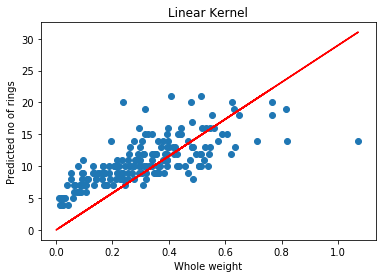

RMSE for Linear Kernel with trivial data: 4.62888164632


In [858]:
plotLinearKernelGraph(trivial_x_train,trivial_y_train,trivial_x_test,trivial_y_test)

<h3>Polynomial Kernel</h3>

Ridge regression using Polynomial Kernel implementation is done on the trivial data and results are visualized graphically. The performance of the same is recorded- The RMSE is 2.678

In [859]:
def plotPolynomialKernelGraph(trivial_x_train,trivial_y_train,trivial_x_test,trivial_y_test):
    betaPolynomialKernel=computePolynomianKernel(trivial_x_train,trivial_y_train,1,0.01,2)
    y_predPoly=predictWithPolynomialKernel(trivial_x_test,trivial_y_test,betaPolynomialKernel,trivial_x_train,1)
    plotGraph(trivial_x_train,trivial_y_train,trivial_x_test,y_predPoly,'Polynomial')
    rms = sqrt(mean_squared_error(trivial_y_test, y_predPoly))
    print 'RMSE for Polynomial Kernel with trivial data:',rms

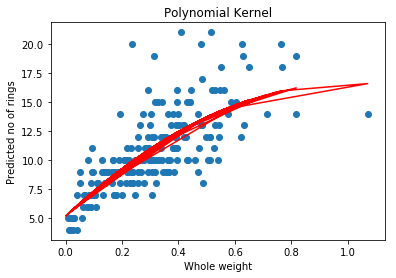

RMSE for Polynomial Kernel with trivial data: 2.67732192971


In [860]:
plotPolynomialKernelGraph(trivial_x_train,trivial_y_train,trivial_x_test,trivial_y_test)

<h3>Gaussian Kernel</h3>

Ridge regression using Gaussian Kernel implementation is done on the trivial data and results are visualized graphically. The performance of the same is recorded- The RMSE is 2.683

In [861]:
def plotGaussianKernelGraph(trivial_x_train,trivial_y_train,trivial_x_test,trivial_y_test):
    betaGaussianKernel=computeGuassianKernel(trivial_x_train,trivial_y_train,0.01,0.5)
    y_predGauss=predictUsingGaussianKernel(trivial_x_test,trivial_y_test,betaGaussianKernel,trivial_x_train,0.5)
    plotGraph(trivial_x_train,trivial_y_train,trivial_x_test,y_predGauss,'Gaussian')
    rms = sqrt(mean_squared_error(trivial_y_test, y_predGauss))
    print 'RMSE for Gaussian Kernel with trivial data:',rms

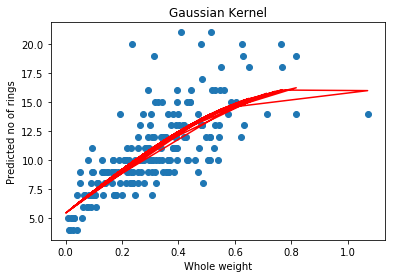

RMSE for Gaussian Kernel with trivial data: 2.68333265294


In [862]:
plotGaussianKernelGraph(trivial_x_train,trivial_y_train,trivial_x_test,trivial_y_test)

We split the dataset into training(60%) and testing(40%) using train_test_split.

In [863]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.4, random_state = 42)
X_train.shape

(600, 7)

In [864]:
A = np.squeeze(np.asarray(X_train))
B = np.squeeze(np.asarray(X_train))
m=len(A)
W_kernel=np.zeros((m,m))
for i in range(len(A)):
    for j in range(len(B)):
        W_kernel[i][j]=(sum(A[i]*B[j]))
    



<h3>Computation of linear kernel</h3>

Formula for ridge regression: y(x) = (K(x)^T) ((K + Lambda * I) * t)

Linear Kernel is given by, K = x * x' -> dot product of two vectors

First term: (K(x)^T) - This is the dot product of X_train and X_test.

Gram matrix: The kernel (K) in the second term is termed as Gram Matrix. For computation of gram matrix, we consider the dot product of the input vectors (X_train * X_train.T).

Lambda: is a scalar hyper parameter. This is multiplied by the identity matrix whose shape is same as the gram matrix.

Then, we compute the sum of Gram Matrix and Lamda which is then multiplied with the response matrix (Y_train). This becomes our linear regression model.



In [865]:
def computeLinearKernel(X_train, y_train,lamda):
    
    m,n=y_train.shape
    betaLinearKernel=np.zeros((m,n))
    I=(np.identity(m))
    betaLinearKernel=np.dot(np.linalg.pinv(np.dot(X_train,np.transpose(X_train))+(lamda*I)),y_train)
    return betaLinearKernel
    

In [866]:

betaLinearKernel=computeLinearKernel(X_train,y_train,0.1)


<h3>Prediction</h3>

Now, for the prediction, we take the dot product of first kernel and our linear regression model. This is the array of predicted values

In [867]:
def predictWithLinearKernel(X_test,y_test,betaLinearKernel,X_train):
    
    
    m,n=X_test.as_matrix().shape
    X_test_1=X_test.as_matrix()
    X_train_1=X_train.as_matrix()
    y_pred= np.dot((np.dot(X_test,np.transpose(X_train))),betaLinearKernel)
    return y_pred
    
   

In [868]:
y_pred=predictWithLinearKernel(X_test,y_test,betaLinearKernel,X_train)

Calculation of RMSE measure: 

In [869]:
rms = sqrt(mean_squared_error(y_test, y_pred))

In [870]:
print rms

2.69733425162


<h3> Computation of Polynomial Kernel</h3>

Polynomial Kernel is given by, K = (gamma *  ( x * x') + R)^M 

Polynomial Kernel: (gamma * (x * x') + R)^M-  where, x is the X_train vector matrix and x' is the X_test vector matrix.

Gram matrix: The kernel (K) in the second term is termed as Gram Matrix. For computation of gram matrix, we consider the dot product of the input vectors (gamma * ( X_train * X_train.T) + R ) ^ M). 

Gamma: This is the scalar hyper parameter

R - This is hyperparameter vector matrix whose shape is same as that of the gram matrix.

Lambda: is a scalar hyper parameter. This is multiplied by the identity matrix whose shape is same as the gram matrix.

M- Power of the gram matrix.

Then, we compute the sum of Gram Matrix and Lamda which is then multiplied with the response matrix (Y_train). This becomes our Polynomial regression model.

In [871]:
def computePolynomianKernel(X_train,y_train,gamma,lamda,power):
    m,n=y_train.shape
    
    betaPolynomialKernel=np.zeros((m,n))
    I=(np.identity(m))
    R=np.ones((m,m))
    dotProd=np.dot(X_train,np.transpose(X_train))
    gammaProd=gamma*dotProd
    RGamma=gammaProd+R
    RGammaSquared=RGamma**power
    lamdaI=lamda*I
    RGammaSquaredPlus=RGammaSquared+lamdaI
    InVprod=np.linalg.pinv(RGammaSquaredPlus)
    betaPolynomialKernel=np.dot(InVprod,y_train)
    return betaPolynomialKernel

    


In [872]:
betaPolynomialKernel=computePolynomianKernel(X_train, y_train,0.1,0.1,2)

Now, for the prediction, we take the dot product of first kernel and our Polynomial regression model. This is the array of predicted values

In [873]:
def predictWithPolynomialKernel(X_test,y_test,betaPolynomialKernel,X_train,gamma):
    
    
    m,n=X_test.as_matrix().shape
    X_test_1=X_test.as_matrix()
    X_train_1=X_train.as_matrix()
    dotProd=np.dot(X_test,np.transpose(X_train))
    R=np.ones(dotProd.shape)
    gammaProd=gamma*dotProd
    RGamma=gammaProd+R
    RGammaSquared=np.multiply(RGamma,RGamma)
    y_pred= np.dot(RGammaSquared,betaPolynomialKernel)
    return y_pred
    

In [874]:
y_pred=predictWithPolynomialKernel(X_test,y_test,betaPolynomialKernel,X_train,0.1)


In [875]:
rms = sqrt(mean_squared_error(y_test, y_pred))

In [876]:
rms

2.7345494054827597

In [877]:
X_train.shape

(600, 7)

In [878]:
X_test.shape

(400, 7)

<h3>Computation of Gaussian Kernel:</h3>

Gaussian Kernel is given by, K(x,x') = exp( gamma * (-sum(x-x')))

For Gram Matrix- Gaussian Kernel is computed with X_train being x and x' and gamma being a scalar hyper parameter.

Lambda: is a scalar hyper parameter. This is multiplied by the identity matrix whose shape is same as the gram matrix.

Then, we compute the sum of Gram Matrix and Lamda which is then multiplied with the response matrix (Y_train). This becomes our Gaussian regression model.


In [879]:
def computeGuassianKernel(X_train,y_train,lamda,gamma):
 
    sq_dists=pdist(X_train,'sqeuclidean')
    m,n=X_train.shape
    variance=np.var(sq_dists)
    mat_sq_dists=squareform(sq_dists)
    k=exp(-gamma*mat_sq_dists)
    I=(np.identity(m))
    betaGaussianKernel=np.dot(np.linalg.pinv(k+(lamda*I)),y_train)
    return betaGaussianKernel

In [880]:

betaGaussianKernel=computeGuassianKernel(X_train,y_train,0.1,1)

In [881]:
def computeExp(x,z,gamma):
    mat_sq_dists=np.sum((x-z)**2)
    k=exp(-gamma*mat_sq_dists)
    return k

In [882]:
def computeKernelGaussian(X_train,y_train):
    A = np.squeeze(np.asarray(X_train))
    B = np.squeeze(np.asarray(X_train))
    m=len(A)
    gamma=1
    W_kernel=np.zeros((m,m))
    
    for i in range(len(A)):
        for j in range(len(B)):
            W_kernel[i][j]=computeExp(A[i],B[j],gamma)
    
    print(W_kernel.shape)

In [883]:
computeKernelGaussian(X_train,y_train)

(600, 600)


Now, for the prediction, we take the dot product of first kernel and our Polynomial regression model. This is the array of predicted values

In [884]:
def predictUsingGaussianKernel(X_test,y_test,betaGaussianKernel,X_train,gamma):
    
    A = np.squeeze(np.asarray(X_test))
    B = np.squeeze(np.asarray(X_train))
    m=len(A)
    n=len(B)
    firstKernel=np.zeros((m,n))
    
    
    for i in range(len(A)):
        for j in range(len(B)):
            firstKernel[i][j]=computeExp(A[i],B[j],gamma)
    
    y_pred=np.dot(firstKernel,betaGaussianKernel)
    return y_pred

In [885]:
y_pred=predictUsingGaussianKernel(X_test,y_test,betaGaussianKernel,X_train,1)

In [886]:
rms = sqrt(mean_squared_error(y_test, y_pred))

In [887]:
rms

2.667218577329414

<h3>Computation of the Best Model</h3>

Initialization of the Kfold

In [888]:
kfl=KFold(n_splits=5, random_state=42, shuffle=True)

The RMSE value is calculated for all the values of Lambda and the best model is returned

In [889]:
def ComputeLinearKernelWithLamdaArray(X_train,y_train,y_test,X_test,lamdaArr):
    betaLinearKernelArr=[]
    rmseArr=[]
    eachlamdaBestArr=[]
    for lamdaIdx in range(len(lamdaArr)):
        eachLamda=lamdaArr[lamdaIdx]
        betaLinearKernel=computeLinearKernel(X_train,y_train,eachLamda)
        betaLinearKernelArr.append(betaLinearKernel)
        y_pred=predictWithLinearKernel(X_test,y_test,betaLinearKernel,X_train)
        rmse = sqrt(mean_squared_error(y_test, y_pred))
        rmseArr.append(rmse)
        
        eachlamdaBestArr.append(eachLamda)
    bestLinearKernel= betaLinearKernelArr[rmseArr.index(np.amin(rmseArr))]
    bestLamda=eachlamdaBestArr[rmseArr.index(np.amin(rmseArr))]
    return bestLinearKernel,rmseArr[rmseArr.index(np.amin(rmseArr))],bestLamda
           

In [890]:
lamdaArr=[0.1,1,10]
gamma=[5,10,15]
r=[2,4,6]

print(len(lamdaArr))

3


In [891]:
def calculatekfoldSplit(train, test, X_train,y_train):

	Xtest_1 = []
	Ytest_1 = []
	Xtrain_1=[]
	Ytrain_1 = []
	for i in range(len(test)):
		Xtest_1.append( X_train.as_matrix()[test[i]])
		Ytest_1.append( y_train.as_matrix()[test[i]])
	Xtest_1= pd.DataFrame(Xtest_1)
	Ytest_1= pd.DataFrame(Ytest_1)
	
	for i in range(len(train)):
		Xtrain_1.append( X_train.as_matrix()[train[i]])
		Ytrain_1.append( y_train.as_matrix()[train[i]])
	Xtrain_1= pd.DataFrame(Xtrain_1)
	Ytrain_1= pd.DataFrame(Ytrain_1)
	
	
	return Xtest_1, Ytest_1, Xtrain_1, Ytrain_1


The RMSE value is calculated for all the values of Lambda, gamma and power and the best model is returned

In [892]:
def ComputePolynomialKernelWithParams(X_train,y_train,y_test,X_test,gammaArr,lamdaArr):
    betaPolynomialKernelArr=[]
    rmseArr=[]
    eachGammaBestArr=[]
    eachlamdaBestArr=[]
    eachPowerArr=[]
    powerArr=[1,2,3,4,5,6,7,8]
    for i in range(len(gammaArr)):
        for j in range(len(lamdaArr)):
            for k in range(len(powerArr)):
                eachGamma=gammaArr[i]
                eachlamda=lamdaArr[j]
                eachPower=powerArr[k]
           
                betaPolynomialKernel=computePolynomianKernel(X_train,y_train,eachGamma,eachlamda,eachPower)
                betaPolynomialKernelArr.append(betaPolynomialKernel)
                y_pred=predictWithPolynomialKernel(X_test,y_test,betaPolynomialKernel,X_train,eachGamma)
                rmse = sqrt(mean_squared_error(y_test, y_pred))
                rmseArr.append(rmse)
            
                eachGammaBestArr.append(eachGamma)
                eachlamdaBestArr.append(eachlamda)
                eachPowerArr.append(eachPower)
    
    betaPolynomialKernel= betaPolynomialKernelArr[rmseArr.index(np.amin(rmseArr))]
    bestGamma=eachGammaBestArr[rmseArr.index(np.amin(rmseArr))]
    bestLamda=eachlamdaBestArr[rmseArr.index(np.amin(rmseArr))]
    bestPower=eachPowerArr[rmseArr.index(np.amin(rmseArr))]
    return betaPolynomialKernel,rmseArr[rmseArr.index(np.amin(rmseArr))],bestGamma,bestLamda,bestPower
            

The RMSE value is calculated for all the values of Lambda and gamma and the best model is returned

In [893]:
def ComputeGaussianKernelWithParams(X_train,y_train,y_test,X_test,gammaArr,lamdaArr):
    betaGaussianKernelArr=[]
    rmseArr=[]
    eachGammaBestArr=[]
    eachlamdaBestArr=[]
    for i in range(len(gammaArr)):
        for j in range(len(lamdaArr)):
            eachGamma=gammaArr[i]
            eachlamda=lamdaArr[j]
            betaGuassianKernel=computeGuassianKernel(X_train,y_train,eachlamda,eachGamma)
            betaGaussianKernelArr.append(betaGuassianKernel)
            y_pred=predictUsingGaussianKernel(X_test,y_test,betaGuassianKernel,X_train,eachGamma)
            rmse = sqrt(mean_squared_error(y_test, y_pred))
            rmseArr.append(rmse)
            eachGammaBestArr.append(eachGamma)
            eachlamdaBestArr.append(eachlamda)
           
    betaGuassianKernel= betaGaussianKernelArr[rmseArr.index(np.amin(rmseArr))]
    bestGamma=eachGammaBestArr[rmseArr.index(np.amin(rmseArr))]
    bestLamda=eachlamdaBestArr[rmseArr.index(np.amin(rmseArr))]
    return betaGuassianKernel,rmseArr[rmseArr.index(np.amin(rmseArr))],bestGamma,bestLamda

Now that we have discussed all the Regression model using Linear, Polynomial and Gaussian Kernels, we still need to find the best kernel model considering various combination of the hyper parameters like lambda, Gamma and power( only in Polynomial). This needs to be done across 5 folds. Furthermore, the best model after 5 fold computation is then tested with the actual test data. Please note that this is done for the kernels implementations. Finally, the kernel model which performed better is considered as the best model for our dataset.

In [894]:
def ComputePerformanceUsingKFold(X,y,kfl):
    lamdaArr=[1e0, 0.1, 1e-2, 1e-3, 0.5, 2,3,5]
    gammaArr=[0.001,0.0001,0.01,0.1,1,0.5,2,3]
    #powerPoly=[1,2,3,4,5]
  
    bestLinearRmseArr=[]
    bestPolynomialRmseArr=[]
    bestGaussianRmseArr=[]
    
    trainLinArr=[]
    trainPolyArr=[]
    trainGuassArr=[]
    
    bestLinearKernelArr=[]
    bestPolynomialKernelArr=[]
    bestGaussianKernelArr=[]
    
    bestLambdaArrLin=[]
    bestLamdaArrPoly=[]
    bestGammaArrPoly=[]
    bestPowerArrPoly=[]
    bestRArrPoly=[]
    bestLambdaArrGuass=[]
    bestGammaArrGuass=[]
    
    
    
    for train,test in kfl.split(X):
        
        X_test,y_test,X_train,y_train=calculatekfoldSplit(train, test, X,y)
        
        bestLinearKernel,bestLinearRmse,bestLamda_l=ComputeLinearKernelWithLamdaArray(X_train,y_train,y_test,X_test,lamdaArr)
        bestLinearRmseArr.append(bestLinearRmse)
        bestLinearKernelArr.append(bestLinearKernel)
        trainLinArr.append(X_train)
        bestLambdaArrLin.append(bestLamda_l)
        
        
        bestPolynomialKernel,bestPolynomialRmse,bestGamma_p,bestLamda_p,bestPower_p=ComputePolynomialKernelWithParams(X_train,y_train,y_test,X_test,gammaArr,lamdaArr)
        bestPolynomialRmseArr.append(bestPolynomialRmse)
        bestPolynomialKernelArr.append(bestPolynomialKernel)
        trainPolyArr.append(X_train)
        bestLamdaArrPoly.append(bestLamda_p)
        bestGammaArrPoly.append(bestGamma_p)
        bestPowerArrPoly.append(bestPower_p)
        
        bestGaussianKernel,bestGaussianRmse,bestGamma_g,bestLamda_g=ComputeGaussianKernelWithParams(X_train,y_train,y_test,X_test,gammaArr,lamdaArr)
        bestGaussianRmseArr.append(bestGaussianRmse)
        bestGaussianKernelArr.append(bestGaussianKernel)
        trainGuassArr.append(X_train)
        bestLambdaArrGuass.append(bestLamda_g)
        bestGammaArrGuass.append(bestGamma_g)
        
        
        
    bestLK= bestLinearKernelArr[bestLinearRmseArr.index(np.amin(bestLinearRmseArr))]
    bestPK= bestPolynomialKernelArr[bestPolynomialRmseArr.index(np.amin(bestPolynomialRmseArr))]
    bestGK= bestGaussianKernelArr[bestGaussianRmseArr.index(np.amin(bestGaussianRmseArr))]
    
    trainLinBest=trainLinArr[bestLinearRmseArr.index(np.amin(bestLinearRmseArr))]
    trainPolyBest=trainPolyArr[bestPolynomialRmseArr.index(np.amin(bestPolynomialRmseArr))]
    trainGuassBest=trainGuassArr[bestGaussianRmseArr.index(np.amin(bestGaussianRmseArr))]
    
    bestLamda_l=bestLambdaArrLin[bestLinearRmseArr.index(np.amin(bestLinearRmseArr))]
    
    bestLamda_p=bestLamdaArrPoly[bestPolynomialRmseArr.index(np.amin(bestPolynomialRmseArr))]
    bestGamma_p=bestGammaArrPoly[bestPolynomialRmseArr.index(np.amin(bestPolynomialRmseArr))]
    bestPower_p=bestPowerArrPoly[bestPolynomialRmseArr.index(np.amin(bestPolynomialRmseArr))]
    
    bestLamda_g=bestLambdaArrGuass[bestGaussianRmseArr.index(np.amin(bestGaussianRmseArr))]
    bestGamma_g=bestGammaArrGuass[bestGaussianRmseArr.index(np.amin(bestGaussianRmseArr))]
    
    
    
    return bestLK,bestPK,bestGK,trainLinBest,trainPolyBest,trainGuassBest,bestLamda_l,bestLamda_p,bestGamma_p,bestLamda_g,bestGamma_g,bestPower_p

We record the best parameters for respective kernel implementations and corresponding performance measure is recorded. In our implementation, we notice that the ridge regression with Polynomial kernel performes the best.

In [895]:
bestLK,bestPK,bestGK,trainLinBest,trainPolyBest,trainGuassBest,bestLamda_l,bestLamda_p,bestGamma_p,bestLamda_g,bestGamma_g,bestPower_p=ComputePerformanceUsingKFold(X_train,y_train,kfl)

y_predL=predictWithLinearKernel(X_test,y_test,bestLK,trainLinBest)
y_predP=predictWithPolynomialKernel(X_test,y_test,bestPK,trainPolyBest,bestGamma_p)
y_predG=predictUsingGaussianKernel(X_test,y_test,bestGK,trainGuassBest,bestGamma_g)

rmseL = sqrt(mean_squared_error(y_test, y_predL))
rmseP = sqrt(mean_squared_error(y_test, y_predP))
rmseG = sqrt(mean_squared_error(y_test, y_predG))

print 'The RMSE for Linear Kernel is ', rmseL 
print 'The RMSE for Polynomial Kernel is ', rmseP
print 'The RMSE for Gaussian Kernel is ', rmseG

print 'The best Lambda for Linear ',bestLamda_l
print 'The best Lambda for Polynomial ',bestLamda_p
print 'The best gamma for Polynomial ',bestGamma_p
print 'The best Power(M) for Polynomial ',bestPower_p
print 'The best Lambda for Gaussian ',bestLamda_g
print 'The best Gamma for Gaussian ',bestGamma_g



The RMSE for Linear Kernel is  2.73923918148
The RMSE for Polynomial Kernel is  2.67578826032
The RMSE for Gaussian Kernel is  2.67756144334
The best Lambda for Linear  0.5
The best Lambda for Polynomial  0.01
The best gamma for Polynomial  1
The best Power(M) for Polynomial  2
The best Lambda for Gaussian  0.01
The best Gamma for Gaussian  0.5
